# IMDB

Loading data......


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
C:\Users\user\anaconda3\envs\tf2\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\user\anaconda3\envs\tf2\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do

25000 train sequences
25000 test sequences
input_train shape: (25000, 500)
input_test shape: (25000, 500)
Epoch 1/10
157/157 [==============================] - 34s 212ms/step - loss: 0.4970 - acc: 0.7675 - val_loss: 0.3510 - val_acc: 0.8612
Epoch 2/10
157/157 [==============================] - 36s 227ms/step - loss: 0.2969 - acc: 0.8852 - val_loss: 0.2852 - val_acc: 0.8878
Epoch 3/10
157/157 [==============================] - 37s 236ms/step - loss: 0.2394 - acc: 0.9086 - val_loss: 0.3256 - val_acc: 0.8716
Epoch 4/10
157/157 [==============================] - 40s 257ms/step - loss: 0.1997 - acc: 0.9253 - val_loss: 0.3582 - val_acc: 0.8572
Epoch 5/10
157/157 [==============================] - 41s 263ms/step - loss: 0.1745 - acc: 0.9366 - val_loss: 0.3588 - val_acc: 0.8426
Epoch 6/10
157/157 [==============================] - 39s 249ms/step - loss: 0.1597 - acc: 0.9413 - val_loss: 0.3736 - val_acc: 0.8640
Epoch 7/10
157/157 [==============================] - 41s 261ms/step - loss: 0.1405 

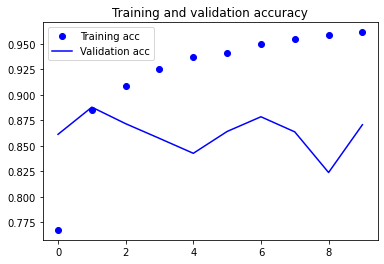

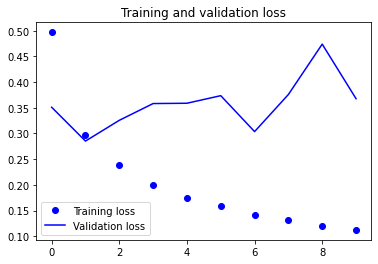

In [3]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, LSTM, GRU
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.datasets import mnist


max_features = 10000
maxlen = 500
batch_size = 32

print('Loading data......')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

from tensorflow.keras.layers import Dense, Embedding

model = Sequential()
model.add(tf.keras.layers.Embedding(max_features, 32))
model.add(tf.keras.layers.LSTM(32))
#model.add(tf.keras.layers.GRU(32))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
hist = model.fit(input_train, y_train,
                 epochs=10,
                 batch_size=128,
                 validation_split=0.2)

import matplotlib.pyplot as plt

acc = hist.history['acc']
val_acc = hist.history['val_acc']
loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()